In [28]:
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('../../data/RAW_interactions.csv')

In [59]:
data = data.drop_duplicates()
data = data.dropna()


KeyError: 'reviews'

In [57]:
total_nb_of_reviews = data['review']
nb_of_na_reviews = total_nb_of_reviews.isna().sum()

print(total_nb_of_reviews.count(), nb_of_na_reviews)

1132198 169


In [35]:
total_nb_of_reviews_wo_na = data['review'].dropna()
total_nb_of_reviews_wo_na.count()

1132198

<Axes: xlabel='rating', ylabel='Count'>

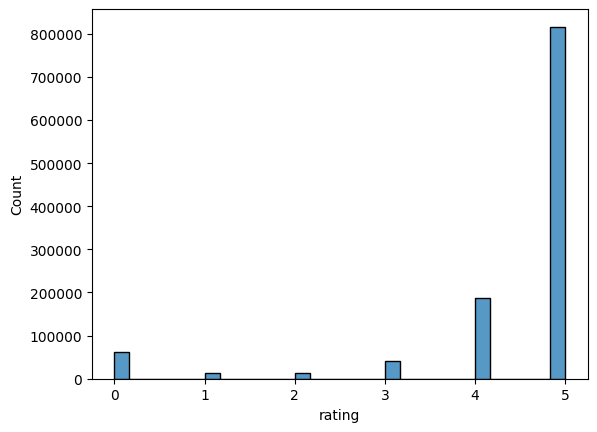

In [30]:
sns.histplot(data=data, x="rating", bins=30)